In [2]:
import os 
import csv
import networkx as nx
g = nx.MultiGraph()

transactionCount = 0
path = os.getcwd() + "/random_data_2.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1

        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['border'] + "*" + row['color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] += int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['border']),(s,row['color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Weaver_id'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        g.add_edge(row['season'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Centre'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Rating'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
#         if transactionCount == 1:
#             break
# print(transactionCount)
# print(g['Accessories'])
# print("sds")
# print(g.nodes[s])
# nx.draw(g, with_labels=True)

In [89]:
# Using pickle to store the graph and can be later loaded into another variable 'g'
import pickle, os
path = os.getcwd() + "/Graph1.txt"
# Uncomment below line to store graph
pickle.dump(g, open(path, 'wb'))

In [90]:
# By loading the graph, we may only add new transactions to existing graph
# Uncomment below line to load teh graph
g = pickle.load(open(path,'rb'))

# Find the current stock of any product available with the company

In [6]:
# Find the current stock of any product available with the company

def findStock(ty="",cat="",bor="",col=""):
    if ty=="" and cat=="" and bor=="" and col=="":
        print("Atleast one attribute/filter must be specified")
    else:
        count = 0

        
        if ty!="":
            d = g[ty]
        elif cat!="":
            d = g[cat]
        elif bor!="":
            d = g[bor]
        else:
            d = g[col]

        for i in d.keys():
            if str(i).find(ty) != -1 and str(i).find(cat) != -1 and str(i).find(bor) != -1 and str(i).find(col) != -1:
                count += g.nodes[i]['Stock']
                # print(i)
                # print(g[i])
        print(count)

# Pass the category, type, border and color to this function to get back the available stock for that product

# findStock(type, category, border, color)
findStock("Accessories","Bermuda","Golden-Zari","Blue")

1834


In [21]:
# To verify that the above query is answered correctly, we can verify using the following code which performs a linear search
# over all records and returns the stock by summing up the quantity of that transaction

with open('random_data_2.csv', encoding='utf-8-sig') as file:
    c = 0
    data = csv.DictReader(file)
    for row in data:
        if row['Category'] == "Bluse" and row['Type'] == "Bagru" and row['border'] == "Floral" and row['color'] == "Green":
            c += int(row['Quantity'])
print(c)

16324


# List all transactions made between a particular weaver and the company.

{0: {'w_id': '2200003', 'quantity': '5', 'month': 'April', 'centre': 'Mumbai', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'October', 'centre': 'Mumbai', 'rating': '5s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'November', 'centre': 'Hyderabad', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '6', 'month': 'October', 'centre': 'Mumbai', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '2', 'month': 'March', 'centre': 'Hyderabad', 'rating': '3s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'November', 'centre': 'Hyderabad', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'September', 'centre': 'Hyderabad', 'rating': '2s'}}
Number of transactions made by weaver with id 2200003 is :  7


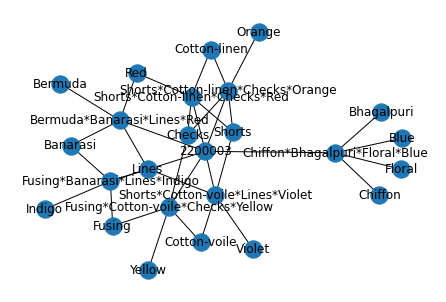

In [22]:
# List all transactions made between a particular weaver and the company.
P = nx.MultiGraph()
def a(id):
    count = 0
    for i in g[id].keys():
        count += 1
        print(g[id][i])
        l = str(i).split("*")
        P.add_edges_from([(id,i),(i,l[0]),(i,l[1]),(i,l[2]),(i,l[3])])
    print("Number of transactions made by weaver with id",id,"is : ",count)

# Pass any weaver id to get the list of transactions between them and the company        
a("2200003")

# Plots the subgraph used to answer this query
nx.draw(P,with_labels=True)


# Fetch transaction details based on month / center / rating of product.

In [151]:
def transactions(months, centres, ratings, wids):
    count = 0

    if wids:
        print("Yess")
        for wid in wids:
            for pdt in g[wid].keys():
                for index in g[wid][pdt].keys():
                    transaction = g[wid][pdt][index].copy()
                    if transaction['w_month'] in months and transaction['w_centre'] in centres and transaction['w_rating'] in ratings:
                        transaction['pdt'] = pdt
                        count += 1

    else:
        print("NO")
        for mon in months:
            # print(g[mon])
            for pdt in g[mon].keys():
                # print(pdt)
                for index in g[mon][pdt].keys():
                    transaction = g[mon][pdt][index].copy()
                    try:
                        transaction['w_centre']
                        if transaction['w_centre'] in centres and transaction['w_rating'] in ratings:
                            transaction['pdt'] = pdt
                    except:
                        if transaction['r_centre'] in centres and transaction['r_rating'] in ratings:
                            transaction['pdt'] = pdt
                        # print(g[mon][pdt][index])
                    count += 1

    print(count)

    
transactions(["January"],["Bangalore"],["1s"],[])
# 141


NO
167040


In [1]:
top={
    'wid':[],
    'q_wid':[],
    'pdt':[],
    'q_pdt':[]
}
x={'wrf':43, 'rwrw':22, 'asssa':33, 'erer': 5, 'qqq': 20}
x={k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
print(x)
top['wid'] =  (list(x.keys()))[:4]
print(top['wid'])
try:
    x['qqq'] += 10
    print(x['qqq'])
except:
    x['qqq'] = 10
    print(x['qqq'])


{'wrf': 43, 'asssa': 33, 'rwrw': 22, 'qqq': 20, 'erer': 5}
['wrf', 'asssa', 'rwrw', 'qqq']
30


In [21]:
def products(types,categories,borders,colors):
    data=[0,[], 0]
    for type in types:
        for product in g[type].keys():
            names=product.split('*')
            for item4 in categories:
                if names[1]==item4:
                    for item5 in borders:
                        if names[2]==item5:
                            for item6 in colors:
                                if names[3]==item6:
                                    temp={product : g.nodes[product]['Stock']}
                                    data[0]+=1
                                    data[1].append(temp)
                                    data[2]+= g.nodes[product]['Stock']
    return data
print(products(["Accessories"],["Bermuda"],["Golden-Zari"],["Blue", "Red"]))
print(data[2])

[2, [{'Accessories*Bermuda*Golden-Zari*Red': 1808}, {'Accessories*Bermuda*Golden-Zari*Blue': 1834}], 3642]


TypeError: 'DictReader' object is not subscriptable

# AFTER MOM 4

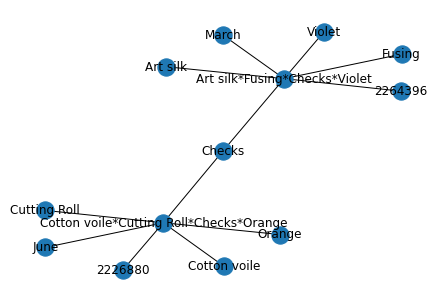

In [1]:
#Weavers
import os 
import csv
import networkx as nx
g = nx.MultiGraph()

transactionCount = 0
path = os.getcwd() + "/weaverdata.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1
        if transactionCount == 3:
            break
        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['Border'] + "*" + row['Color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] += int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['Border']),(s,row['Color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Weaver_id'], s, w_id=row['Weaver_id'] ,w_quantity=row['Quantity'], w_month=row['Month'], w_year=row['Year'], w_region=row['Region'], w_centre=row['Centre'], w_rating=row['Rating'],w_cost=row['Cost'], relation='SoldBy')
        g.add_edge(row['Month'], s, w_id=row['Weaver_id'] ,w_quantity=row['Quantity'], w_month=row['Month'], w_year=row['Year'], w_region=row['Region'], w_centre=row['Centre'], w_rating=row['Rating'],w_cost=row['Cost'], relation='SoldIn')

nx.draw(g, with_labels=True)
# print(g)

In [144]:
# Retailers
transactionCount = 0
path = os.getcwd() + "/NewData.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1
        # if transactionCount == 1001:
        #     break
        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['Border'] + "*" + row['Color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] -= int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock= -int(row['Quantity']))
            # g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['Border']),(s,row['Color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Retailer_id'], s, r_id=row['Retailer_id'] ,r_quantity=row['Quantity'], r_r_month=row['Month'], r_year=row['Year'], r_region=row['Region'], r_centre=row['Centre'], r_rating=row['Rating'],r_cost=row['Cost'], relation='BoughtBy')
        g.add_edge(row['Month'], s, r_id=row['Retailer_id'] ,r_quantity=row['Quantity'], r_month=row['Month'], r_year=row['Year'], r_region=row['Region'], r_centre=row['Centre'], r_rating=row['Rating'],r_cost=row['Cost'],relation='BoughtIn')

# nx.draw(g, with_labels=True)
# print(g)

In [145]:
import pickle, os
path = os.getcwd() + "/Graph1.txt"
# Uncomment below line to store graph
pickle.dump(g, open(path, 'wb'))

In [146]:
g = pickle.load(open(path,'rb'))

In [229]:
                            
def transactions(months, centres, ratings, wids):
    global g
    data = [0, []]
    if wids:
        for wid in wids:
            for pdt in g[wid].keys():
                for index in g[wid][pdt].keys():
                    transaction = g[wid][pdt][index].copy()
                    # print(transaction)
                    if transaction['w_month'] in months and transaction['w_centre'] in centres and transaction['w_rating'] in ratings:
                        transaction['pdt'] = pdt
                        data[1].append(transaction)
                        data[0] += 1

    else:
        for mon in months:
            for pdt in g[mon].keys():
                for index in g[mon][pdt].keys():
                    transaction = g[mon][pdt][index].copy()
                    try:
                        if transaction['w_centre'] in centres and transaction['w_rating'] in ratings:
                            transaction['pdt'] = pdt
                            data[1].append(transaction)
                            data[0] += 1
                    except:
                        pass
    return data
print(transactions(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],["Bangalore", "Hyderabad", "Mumbai", "Agra", "Delhi", "Chennai", "Kolkata", "Ahmedabad", "Patna", "Lucknow", "Jaipur", "Ranchi"],['1','2','3','4','5'],['2221912','2245035','2268299','2296138']))

[39, [{'w_id': '2221912', 'w_quantity': '3', 'w_month': 'November', 'w_year': '2014', 'w_region': 'South', 'w_centre': 'Hyderabad', 'w_rating': '5', 'w_cost': '1376', 'relation': 'SoldBy', 'pdt': 'Cotton tant*Crochet Lace*Lines*Green'}, {'w_id': '2221912', 'w_quantity': '4', 'w_month': 'December', 'w_year': '2011', 'w_region': 'North', 'w_centre': 'Agra', 'w_rating': '1', 'w_cost': '1322', 'relation': 'SoldBy', 'pdt': 'Accessories*Beads*Floral*Violet'}, {'w_id': '2221912', 'w_quantity': '2', 'w_month': 'July', 'w_year': '2012', 'w_region': 'South', 'w_centre': 'Chennai', 'w_rating': '2', 'w_cost': '1298', 'relation': 'SoldBy', 'pdt': 'Bagru*Fusing*Golden Zari*Indigo'}, {'w_id': '2221912', 'w_quantity': '6', 'w_month': 'September', 'w_year': '2013', 'w_region': 'West', 'w_centre': 'Ahmedabad', 'w_rating': '4', 'w_cost': '1113', 'relation': 'SoldBy', 'pdt': 'Cotton tant*Cutting Roll*Golden Zari*Green'}, {'w_id': '2221912', 'w_quantity': '1', 'w_month': 'October', 'w_year': '2011', 'w_reg

In [121]:
def newfun(role,filter,filter2,centre,month,year):
    dict1={}
    dict2={}
    dict3={}
    list1=[0,0,[]]
    list2=[0,0,[]]
    data=[0,0,[]]
    if filter=='Type':
        q=0
    elif filter=='Category':
        q=1
    elif filter=='Border':
        q=2
    elif filter=='Color':
        q=3

    if filter2=='month':
        var1='w_month'
        var2='r_month'
        var3=month
        data[0]=1
    elif filter2=='centre':
        var1='w_centre'
        var2='r_centre'
        var3=centre
        data[0]=0
    elif filter2=='year':
        var1='w_year'
        var2='r_year'
        var3=year
        data[0]=2
    
    for elements in var3:
        tup={elements : {}}
        dict1.update(tup)
    for elements in var3:
        tup={elements : {}}
        dict2.update(tup)
    for elements in var3:
        tup={elements : 0}
        dict3.update(tup)
    

    
    for item in month:
        for item2 in g[item].keys():
            for item3 in g[item][item2].keys():
                if role=='Weaver':
                    if g[item][item2][item3]['relation']=='SoldIn' and g[item][item2][item3]['w_centre'] in centre and g[item][item2][item3]['w_year'] in year:
                        data[1]+=1
                        temp=item2.split('*')
                        dict3[g[item][item2][item3][var1]]+=1
                        if temp[q] in dict1[g[item][item2][item3][var1]].keys():
                            dict1[g[item][item2][item3][var1]][temp[q]]+=1
                            dict2[g[item][item2][item3][var1]][temp[q]]+=int(g[item][item2][item3]['w_quantity'])
                        else:
                            temp3={temp[q] : 1}
                            dict1[g[item][item2][item3][var1]].update(temp3)
                            temp3={temp[q] : int(g[item][item2][item3]['w_quantity'])}
                            dict2[g[item][item2][item3][var1]].update(temp3)
                elif role=='Retailer':
                    if g[item][item2][item3]['relation']=='BoughtIn' and g[item][item2][item3]['r_centre'] in centre and g[item][item2][item3]['r_year'] in year:
                        data[1]+=1
                        temp=item2.split('*')
                        dict3[g[item][item2][item3][var2]]+=1
                        if temp[q] in dict1[g[item][item2][item3][var2]].keys():
                            dict1[g[item][item2][item3][var2]][temp[q]]+=1
                            dict2[g[item][item2][item3][var2]][temp[q]]+=int(g[item][item2][item3]['r_quantity'])
                        else:
                            temp3={temp[q] : 1}
                            dict1[g[item][item2][item3][var2]].update(temp3)
                            temp3={temp[q] : int(g[item][item2][item3]['r_quantity'])}
                            dict2[g[item][item2][item3][var2]].update(temp3)
            
               
    for i in dict1.keys():
        dict4=dict1[i].copy()
        dict5=dict2[i].copy()
        for j in dict5.keys():
            list1[2].append({j:dict4[j]})
            list1[2].append({j:dict5[j]})
        list1[0]=i
        list1[1]=dict3[i]
        list2=list1.copy()
        list2[2]=list1[2].copy()
        list1[2].clear()
        data[2].append(list2)       
    return data

In [136]:
months=['June', 'July', 'January', 'March']
centres=['Mumbai','Patna','Jaipur','Ranchi', 'Bangalore', 'Hyderabad', 'Delhi']
filter='Color'
year=['2012','2011','2014']
role='Weaver'
filter2='centre'

# print(newfun(role,filter,filter2,centres,months,year))
data = newfun(role,filter,filter2,centres,months,year)
Data = data[2]
# print(Data)
# print(data)
formData = {}
formData['Colors'] = ["Blue", "Red", "Orange", "Violet", "Green", "Yellow", "Indigo"]
l = []
for col in formData['Colors']:
                flag = 0
                L =[]
                L.append(col)
                Data = data[2]
                for j in Data:
                    k = j[2]
                    for h in k:
                        try:
                            if h[col]:
                                if flag==1:
                                    L.append(h[col])
                                    flag = 0
                                else:
                                    flag = 1
                        except:
                            pass
                l.append(L)
print(l)


[['Blue', 12075, 11830, 11573, 12202, 11698, 12315, 11691], ['Red', 12299, 11833, 11787, 11560, 12183, 11836, 12242], ['Orange', 11997, 12093, 12070, 12161, 12077, 11909, 12353], ['Violet', 11831, 11376, 11294, 12441, 11782, 11937, 12051], ['Green', 12367, 12443, 11649, 12083, 11851, 12157, 12045], ['Yellow', 12125, 11538, 12388, 12069, 11988, 12128, 12373], ['Indigo', 11573, 11475, 11781, 12028, 11555, 11881, 11425]]


In [225]:
# print(g['Art silk*Fusing*Checks*Violet'])
# print(g.nodes['Art silk*Fusing*Checks*Violet'])
months=['March']
centres=["Agra"]
filter1='Type'
years=['2011']
role='Retailer'
filter2='Month'
def stat(filter1, filter2, role, centres, months, years):
    head = [filter1]
    res = {}
    filter = months
    if role == 'Weaver':
        rel = 'SoldIn'
        qnty = 'w_quantity'
        month = 'w_month'
        year = 'w_year'
        centre = 'w_centre'
    else:
        rel = 'BoughtIn'
        qnty = 'r_quantity'
        month = 'r_month'
        year = 'r_year'
        centre = 'r_centre'
    if filter2 == 'Month':
        filter = months
        filter2 = month
    elif filter2 == 'Centre':
        filter = centres
        filter2 = centre
    elif filter2 == 'Year':
        filter = years
        filter2 = year
    if filter1 == 'Color':
        index = 3
    elif filter1 == 'Border':
        index = 2
    elif filter1 == 'Category':
        index = 1
    else:
        index = 0
    for i in filter:
        head.append(i)
    data = [head]
    for mon in months:
        for pdt in g[mon].keys():
            # print(g[mon][pdt],"\n\n")
            for i in g[mon][pdt].keys():
                tran = g[mon][pdt][i]
                if tran['relation'] == rel and tran[year] in years and tran[centre] in centres:
                    s = pdt.split('*')[index]
                    # if s == 'Asilkrt':
                    #     print(tran)
                    try:
                        res[s]
                        try:
                            res[s][tran[filter2]] += int(tran[qnty])
                        except:
                            res[s][tran[filter2]] = int(tran[qnty])
                    except:
                        
                        res[s] = {tran[filter2]: int(tran[qnty])}
    body = []
    for i in res.keys():
        l = []
        l.append(i)
        for j in filter:
            try:
                l.append(res[i][j])
            except:
                l.append(0)
        body.append(l)
    data.append(body)
    # print(data)
    return data
stat(filter1, filter2, role, centres, months, years)   

Art silk
Chanderi cotton
Cotton linen
Bhagalpuri
Cotton voile
Bagru
Accessories
Cotton tant
Banarasi


[['Type', 'March'],
 [['Art silk', 610],
  ['Chanderi cotton', 614],
  ['Cotton linen', 610],
  ['Bhagalpuri', 521],
  ['Cotton voile', 656],
  ['Bagru', 658],
  ['Accessories', 527],
  ['Cotton tant', 661],
  ['Banarasi', 567],
  ['Asilkrt ', 1]]]

In [154]:
def product(filter,type,category,border,color):
    dict1={}
    row=[]
    row2=[]
    table=[]
    table2=[]
    prod=[]
    for i in type:
        for j in g[i].keys():
            var1=j.split('*')
            if var1[0] in category and var1[2] in border and var1[3] in color:
                for item in g[j].keys():
                    if item.isnumeric():
                        for item2 in g[j][item].keys():
                            if g[j][item][item2]['relation']=='SoldBy':
                                if g[j][item][item2]['w_centre'] not in dict1.keys():
                                    tup2={g[j][item][item2]['w_centre'] : {}}
                                    dict1.update(tup2)
                                if j not in prod:
                                    prod.append(j)
                                if j in dict1[g[j][item][item2]['w_centre']].keys():
                                    dict1[g[j][item][item2]['w_centre']][j]+=int(g[j][item][item2]['w_quantity'])
                                else:
                                    temp3={j : int(g[j][item][item2]['w_quantity'])}
                                    dict1[g[j][item][item2]['w_centre']].update(temp3)
                            elif g[j][item][item2]['relation']=='BoughtBy':
                                if g[j][item][item2]['r_centre'] not in dict1.keys():
                                    tup2={g[j][item][item2]['r_centre'] : {}}
                                    dict1.update(tup2)
                                if j not in prod:
                                    prod.append(j)
                                if j in dict1[g[j][item][item2]['r_centre']].keys():
                                    dict1[g[j][item][item2]['r_centre']][j]-=int(g[j][item][item2]['r_quantity'])
                                else:
                                    temp3={j : -int(g[j][item][item2]['r_quantity'])}
                                    dict1[g[item][item2]['r_centre']].update(temp3)
    head=['Type','Category','Border','Color']
    for items in dict1.keys():
        head.append(items)
    table.append(head)
    for i in range(len(prod)):
        tup={prod[i] : int(g.nodes[prod[i]]['Stock'])}
        table2.append(tup)
        var=prod[i].split('*')
        for j in range(4):
            row.append(var[j])
        for item2 in dict1.keys():
            if prod[i] in dict1[item2].keys():
                row.append(abs(dict1[item2][prod[i]]))
            else:
                row.append(0)
        row2=row.copy()
        table.append(row2)
        row.clear()
    if filter=='split':
        return table
    else:
        return table2

In [213]:
def product(filter,type,category,border,color):
    dict1={}
    row=[]
    row2=[]
    table=[]
    table2=[]
    prod=[]
    for i in type:
        for j in g[i].keys():
            var1=j.split('*')
            if var1[1] in category and var1[2] in border and var1[3] in color:
                for item in g[j].keys():
                    if item.isnumeric():
                        for item2 in g[j][item].keys():
                            if g[j][item][item2]['relation']=='SoldBy':
                                if g[j][item][item2]['w_centre'] not in dict1.keys():
                                    tup2={g[j][item][item2]['w_centre'] : {}}
                                    dict1.update(tup2)
                                if j not in prod:
                                    prod.append(j)
                                if j in dict1[g[j][item][item2]['w_centre']].keys():
                                    dict1[g[j][item][item2]['w_centre']][j]+=int(g[j][item][item2]['w_quantity'])
                                else:
                                    temp3={j : int(g[j][item][item2]['w_quantity'])}
                                    dict1[g[j][item][item2]['w_centre']].update(temp3)
                            elif g[j][item][item2]['relation']=='BoughtBy':
                                if g[j][item][item2]['r_centre'] not in dict1.keys():
                                    tup2={g[j][item][item2]['r_centre'] : {}}
                                    dict1.update(tup2)
                                if j not in prod:
                                    prod.append(j)
                                if j in dict1[g[j][item][item2]['r_centre']].keys():
                                    dict1[g[j][item][item2]['r_centre']][j]-=int(g[j][item][item2]['r_quantity'])
                                else:
                                    temp3={j : -int(g[j][item][item2]['r_quantity'])}
                                    dict1[g[item][item2]['r_centre']].update(temp3)
    head=['Type','Category','Border','Color']
    for items in dict1.keys():
        head.append(items)
    table.append(head)
    for i in range(len(prod)):
        tup={prod[i] : int(g.nodes[prod[i]]['Stock'])}
        table2.append(tup)
        var=prod[i].split('*')
        for j in range(4):
            row.append(var[j])
        for item2 in dict1.keys():
            if prod[i] in dict1[item2].keys():
                row.append(abs(dict1[item2][prod[i]]))
            else:
                row.append(0)
        row2=row.copy()
        table.append(row2)
        row.clear()
    if filter=='split':
        return table
    else:
        data = [["Type", "Category", "Border", "Color", "Stock"]]
        for i in table2:
            j = list(i.keys())[0].split("*")
            j.append(list(i.values())[0])
            data.append(j)
        return data

In [218]:
type_list1=["Accessories"]
category_list1=['Beads']
border_list1=['Checks']
color_list1=['Red']
filter='split'
data = product(filter,type_list1,category_list1,border_list1,color_list1)
print(data)

[['Type', 'Category', 'Border', 'Color', 'Kolkata', 'Ahmedabad', 'Mumbai', 'Agra', 'Jaipur', 'Patna', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Ranchi', 'Lucknow'], ['Accessories', 'Beads', 'Checks', 'Red', 3, 26, 18, 3, 0, 52, 63, 5, 25, 78, 5, 61]]
